In [2]:
import numpy as np
from matplotlib import pyplot as plt

macros latex
$$ 
\def\R{{\mathbb R}} 
\def\x{{\bf x}}
\def\y{{\bf y}}
\def\a{{\bf a}}
$$

# Regression linéaire

## introduction n°1 : approximation par une constante

On dispose d'un ensemble de relevés de $m$ mesures sur une grandeur $Y$ lors d'une expérience scientifique répétée plusieurs fois. Par exemple, la mesure du pH d'une solution   après une réaction chimique.
 $$ y^1=5.7, y^2=5.8, y^3=5.7, y^4=5.6, y^5=5.85, \dots $$
  Par quelle valeur constante $b$ **prédire** la véritable mesure ?

In [5]:
Y = np.array([5.7, 5.8, 5.7, 5.6, 5.85, 5.91, 5.73])

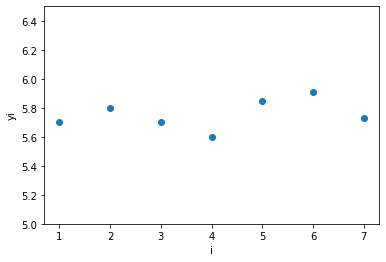

In [10]:
plt.ylim(5,6.5) ; plt.xlabel('i') ; plt.ylabel('yi')
plt.plot(list(range(1,1+len(Y))),Y,'o')
plt.show()

On mesure l'erreur d'une prédiction $b$ entre la mesure prédite et les mesures observées par l'**erreur quadratique moyenne**
$$\text{EQM}(b) = \frac1{m} \sum_{i=1}^m (b-y^i)^2$$

Représentation de l'EQM en fonction de $b$

In [15]:
b = 5
m = len(Y)
EQM = lambda b: sum([(b-yi)**2 for yi in Y])

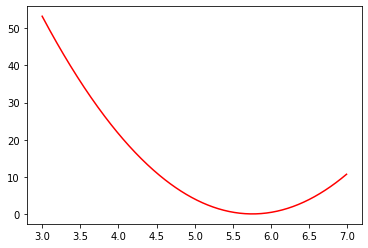

In [19]:
X = np.arange(3,7,0.01)
Z = EQM(X)
plt.plot(X,Z,'r') ; plt.show()

L'EQM est une fonction strictement convexe de $b$, dont le minimum peut être déterminé par l'annulation de la dérivée

$$ \frac{d}{db}( \frac1{m} \sum_{i=1}^m (b-y^i)^2 ) = 0$$
$$\frac1{m} \sum_{i=1}^m 2(b - y^i ) = 0 $$
$$ 2b - 2 \frac1{m} \sum_{i=1}^m y^i  = 0$$
$$ b =  \frac1{m} \sum_{i=1}^m y^i $$




La moyenne arithmétique $$\bar{y} = \frac1{m} \sum_{i=1}^m y^i $$ minimise donc l'erreur quadratique moyenne.  
Parmi toutes les prédictions constantes possibles, celle qui approche le mieux au sens de l'EQM les données est la moyenne arithmétique.

## Approximation par une fonction linéaire

On a cette fois ci des données de la forme $(x^i,y^i)$ pour $i$ de 1 à $m$ où $y^i$ est l'image de $x^i$ par une fonction inconnue que l'on cherche à approximer. On suppose que les points sont situés presque alignés sur une droite passant par l'origine, et on cherche donc une fonction de la forme $g(x) = ax$ pour l'approximation.

exemple :

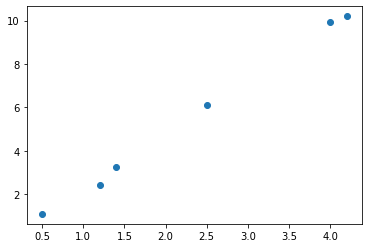

In [23]:
X = np.array([0.5, 1.2, 1.4, 2.5, 4, 4.2])
Y = np.array([1.1 ,  2.41,  3.26,  6.1  ,  9.92 , 10.2])
plt.plot(X,Y,'o') ; plt.show()

On mesure de nouveau la qualité de l'approximation par l'erreur quadratique moyenne :
$$EQM = \frac1{m} \sum_{i=1}^m (a x^i - y^i)^2$$

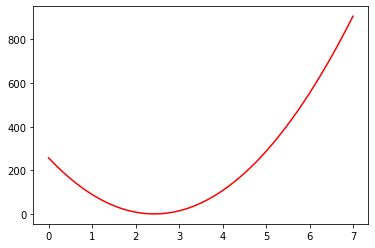

In [51]:
EMQ2 = lambda a: ((a*X-Y)**2).sum()
A = np.arange(0,7,0.01)
plt.plot(A,[EMQ2(a) for a in A],'r') ; plt.show()

L'EMQ est minimale quand sa dérivée s'annule :
$$ \frac{d}{da}( \frac1{m} \sum_{i=1}^m (ax^i-y^i)^2 ) = 0$$
$$\frac1{m} \sum_{i=1}^m 2x^i(ax^i - y^i ) = 0 $$
$$ \frac2{m} \sum_{i=1}^m a (x^i)^2 - \frac2{m} \sum_{i=1}^m x^i y^i  = 0$$
$$ \boxed{a_\min =  \frac{\frac1{m} \sum_{i=1}^m x^i y^i}{\frac1{m} \sum_{i=1}^m (x^i)^2}} $$



In [52]:
amin = sum(X*Y) / sum(X*X) ; amin

2.4293982544786403

Vérification expérimentale de la formule obtenue

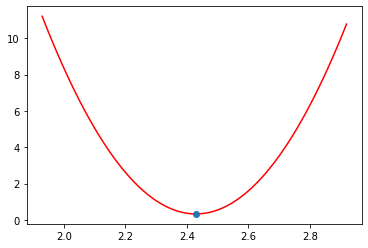

In [62]:
A = np.arange(amin-0.5,amin+0.5,0.01)
plt.plot(A, [EMQ2(a) for a in A],'r') ; plt.plot(amin,EMQ2(amin),'o')
plt.show()

Droite de régression *linéaire* (non affine) obtenue

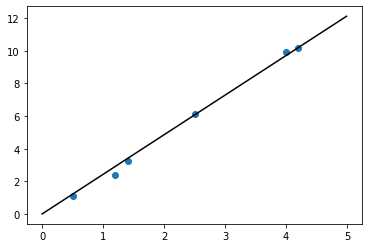

In [64]:
dr = lambda x:amin*x
X2 = np.arange(0,5,0.01)
plt.plot(X,Y,'o',X2,dr(X2),'k') ; plt.show()

## Regression linéaire simple
C'est le terme utilisé pour la regression linéaire en dimension 1. Attention on emploie le terme linéaire mais il s'agit en fait d'une regression affine en dimension 1 (qui revient à une reg. linéaire en dim 2, voir plus tard).

### Le problème
On a toujours des couples de données de dimension 1, sous la forme $(x^i,y^i)$ pour $1 \leq i \leq m$, mais on cherche maintenant une approximation de ces données par une droite qui ne passe pas forcément par l'origine. Plus précisément, on cherche à approximer la fonction inconnue $f$ telle que $f(x^i)=y^i$ par une fonction $g$ de la forme $g(x) = ax+b$.

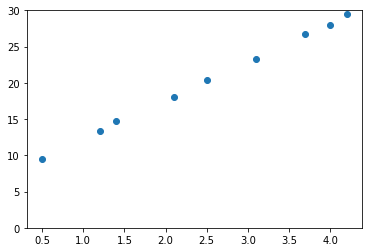

In [72]:
X = np.array([0.5, 1.2, 1.4, 2.5, 3.1, 4, 4.2, 2.1, 3.7])
Y = np.array([ 9.5, 13.4, 14.7, 20.4, 23.3, 28 , 29.51, 18.1, 26.71])
plt.ylim(0,30)
plt.plot(X,Y,'o') ; plt.show()

On va chercher les paramètres $a$ et $b$ qui minimisent l'erreur quadratique moyenne :
$$ \boxed{EQM = \frac1{m} \sum_{i=1}^m (a x^i  + b - y^i)^2}$$

note : ceci revient à minimiser la distance entre les vecteur $a {\bf x}+b \mathbb{1} $ et 
$y$ au sens de la norme 2.

In [97]:
a1 = np.arange(3,7,0.05)
b1 = np.arange(5,8,0.05)
A, B = np.meshgrid(a1,b1)

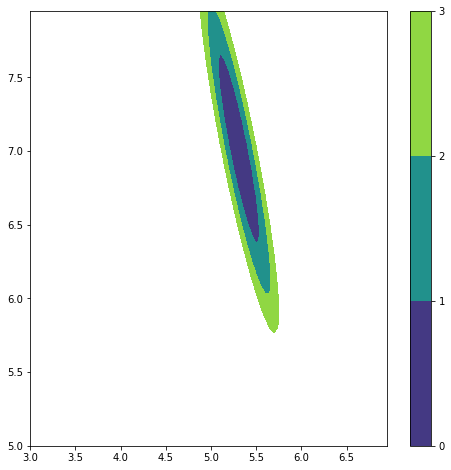

In [98]:
EQN3 = lambda a,b: sum([(a*X[i]+b-Y[i])**2 for i in range(len(X))])
Z = EQN3(A,B) ; levels = [0.0, 1.0, 2.0, 3.0,]
plt.figure(figsize=(8,8))
cp = plt.contourf(A, B, Z, levels)
plt.colorbar(cp) ; plt.show()

### Résolution
$$ \boxed{EQM = \frac1{m} \sum_{i=1}^m (a x^i  + b - y^i)^2}$$
EQM est maintenant une fonction quadratique convexe de deux variables $a$ et $b$. Cette fonction admet un minimum où son gradient $\nabla_{EQM}$ s'annule, soit
$$ \frac{\partial EQM(a,b)}{\partial a} = \frac{\partial}{\partial a}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0 $$
$$\text{ et }  \frac{\partial EQM(a,b)}{\partial b}=\frac{\partial}{\partial b}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0$$

$$
\begin{align}
\begin{cases}
\frac{\partial}{\partial a}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0\\
 \frac{\partial}{\partial b}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0\\
\end{cases}
\end{align}
$$

$$
\begin{align}
\begin{cases}
 \frac1{m} \sum_{i=1}^m 2x^i(ax^i+b-y^i) = 0\\
 \frac1{m} \sum_{i=1}^m 2(ax^i+b-y^i) = 0\\
\end{cases}
\end{align}
$$

(on simplifie par 2)
$$
\begin{align}
\begin{cases}
 a \frac1{m} \sum_{i=1}^m (x^i)^2 + b \frac1{m} \sum_{i=1}^m x^i - \frac1{m} \sum_{i=1}^m x^i y^i = 0\\
 a \frac1{m} \sum_{i=1}^m x^i + b - \frac1{m} \sum_{i=1}^m y^i = 0\\
\end{cases}
\end{align}
$$

(reprise)
$$
\begin{align}
\begin{cases}
 a \frac1{m} \sum_{i=1}^m (x^i)^2 + b \frac1{m} \sum_{i=1}^m x^i - \frac1{m} \sum_{i=1}^m x^i y^i = 0\\
 a \frac1{m} \sum_{i=1}^m x^i + b - \frac1{m} \sum_{i=1}^m y^i = 0\\
\end{cases}
\end{align}
$$

qui peut se noter plus simplement
$$
\begin{align}
\begin{cases}
 a \cdot \overline{x^2} + b \cdot \overline{x} - \overline{xy} = 0\\
 a \cdot \overline{x} + b - \overline{y} = 0\\
\end{cases}
\end{align}
$$
où la barre désigne la moyenne d'une série de termes $(x^i)^2, (x^i)$ ou $(x^i y^i)$.

On vérifie (exercice) que 
$$\overline{x^2} = var(x) + (\overline{x})^2$$
où
$$var(x) = \overline{(x-\overline{x})^2}= \frac1{m} \sum_{i=1}^m (x_i - \overline{x})^2$$
est la variance de $m$ c'est à dire *la moyenne des carrés des écarts de $x$ à sa moyenne*

On vérifie de même que
$$\overline{xy} = cov(x,y) + \overline{x}\cdot\overline{y}$$
où
$$cov(x,y)=\overline{(x-\bar{x})(y-\bar{y})} = \frac1{m} \sum_{i=1}^m (x_i - \overline{x})(y_i - \overline{y}) $$
est la covariance de $x$ et $y$.
(Remarquer $var(x)=cov(x,x)$)

Le système peut alors s'écrire
$$
\begin{align}
\begin{cases}
 a \cdot (var(x) + (\overline{x})^2) + b \cdot \overline{x} - (cov(x,y) + \overline{x} \overline{y}) = 0\\
 a \cdot \overline{x} + b - \overline{y} = 0\\
\end{cases}
\end{align}
$$
 

En remplaçant dans la première équation $b$ par $\overline{y} - a \cdot \overline{x} $ on obtient
$$a \cdot (var(x) + (\overline{x})^2) + ((\overline{y} - a \cdot \overline{x}) \cdot \overline{x} - (cov(x,y) + \overline{x} \overline{y}) = 0 $$


qui se simplifie en
$$ a \cdot var(x) - cov(x,y) = 0$$
On obient donc comme solutions
$$\boxed{
\begin{align}
\begin{cases}
 a^* = \frac{cov(x,y)}{var(x)}\\
 b^* = \overline{y} - a^* \overline{x} \\
\end{cases}
\end{align}}
$$
 

### Vérification expérimentale
$$
\begin{align}
\begin{cases}
 a^* = \frac{cov(x,y)}{var(x)}\\
 b^* = \overline{y} - a^* \overline{x} \\
\end{cases}
\end{align}
$$

In [95]:
a = ((X-X.mean())*(Y-Y.mean())).mean() / ((X-X.mean())**2).mean() 
b = Y.mean() - a*X.mean()
a,b

(5.308010479517307, 7.014240234995237)

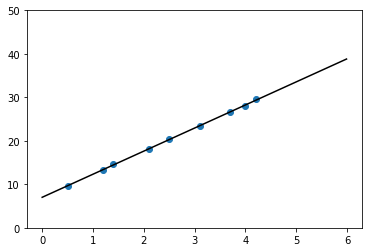

In [102]:
plt.ylim(0,50)
dr = lambda x:a*x+b
X2 = np.arange(0,6,0.01)
plt.plot(X,Y,'o',X2,dr(X2),'k') ; plt.show()

**Autre exemple**
On génère des points au hasard d'abscisse dans $[0;2]$ situés sur la droite d'équation $y = 5x+7$ plus un "bruit" suivant la loi normale centrée réduite.

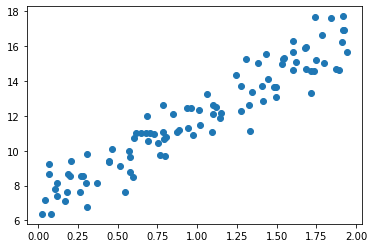

In [7]:
X = 2 * np.random.rand(100, 1)
Y = 5 * X + 7 + np.random.randn(100, 1)
plt.plot(X,Y,'o')

In [8]:
# calcul des coefficients de régression
a = ((X-X.mean())*(Y-Y.mean())).mean() / ((X-X.mean())**2).mean() 
b = Y.mean() - a*X.mean()
a,b

(4.820800267745469, 7.12702604425506)

On n'obtient pas exactement 5 et 7 à cause du bruit aléatoire

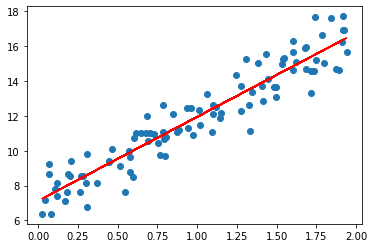

In [11]:
plt.plot(X,Y,'o')
plt.plot(X,a*X+b,'r-')
#plt.plot(X,5*X+7)
plt.show()

## Regression linéaire en dimension $d$

On passe au cas général. $$\def \bx{{\bf x}}$$
Les données sont de la forme $(\bx^i,y^i)$ mais les $\bx^i$ sont des vecteurs de dimension $d$
$$\bx^i = (x^i_1,x^i_2,\cdots,x^i_d) \in \mathbb{R}^d$$

On cherche à approximer une fonction inconnue $f$ telle que
$$y_i = f(x^i_1,x^i_2,\cdots,x^i_d)$$
par une fonction multilinéaire (affine) de la forme
$$g(\bx) = a_0 + a_1 x_1 + a_2 x_2 + \dots a_d x_d$$

### exemple : jeu de données *Advertising*
Données commerciales sur les ventes d'un produit dans différents points de vente en fonction du budget dépensé en publicité dans trois medias différents.

In [131]:
import sklearn as sk
import pandas as pd
data_adv = pd.read_csv("datasets/advertising.csv")
data_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Peut-on prédire les ventes en fonction de la publicité dépensée ? Quel est l'investissement le plus rentable ?
On va chercher à écrire une relation
$$ S \approx a_0 + a_1 TV + a_2 Rad + a_3 News $$

### Résolution
Pour l'analyse il est plus facile d'ajouter une $(d+1)$-ième coordonnée à l'indice 0 aux vecteurs $x^i$, qui vaut toujours $1$, de sorte qu'on puisse écrire $g(x)$ sous la forme
$$g(\bx) = \sum_{j=0}^d a_j x_j$$ 
et se ramener à la recherche d'une fonction sans terme constant.

L'erreur quadratique moyenne est donnée par
$$
\begin{align}
EQM &= \frac1{m} \sum_{i=1}^m (\sum_{j=0}^d a_j x^i_j - y^i)^2 \\
    &= \frac1{m} \sum_{i=1}^m (g(\x^i) - y^i)^2
\end{align}$$

La fonction EQM admet un minimum par convexité, une condition nécessaire est que le gradient soit nul
$$\forall 0 \leq k \leq m, \frac{\partial}{\partial a_k} \left( \sum_{i=1}^m (\sum_{j=0}^d a_j x^i_j - y^i)^2 \right) = 0$$

soit
$$\forall 0 \leq k \leq m, \sum_{i=1}^m x_k^i \left(\sum_{j=0}^d a_j x^i_j - y^i \right) = 0$$

$$\forall 0 \leq k \leq m, \sum_{i=1}^m \sum_{j=0}^d x_k^i  x^i_j a_j = \sum_{i=1}^m x_k^i y^i $$

On introduit les notations : $$\def\ba{{\bf a}} \def\by{{\bf y}}$$
- matrice $X$ avec $X_{i,j}=x^i_j$ pour $1 \leq i \leq m$ et $0 \leq j \leq d$. La matrice $X$ contient donc chacun des vecteurs de données sur ses lignes et les colonnes correspondent aux caractéristiques des données. 
- vecteur $\ba$ avec $\ba_j = a_j$ pour $0 \leq j \leq d$
- vecteur $\by$ avec $\by_i = y^i$ pour $1 \leq i \leq m$


à $k$ fixé 
$$\sum_{i=1}^m \sum_{j=0}^d x_k^i  x^i_j a_j = \sum_{i=1}^m x_k^i y^i $$
s'écrit
$$(X^T X \cdot \a)_k = (X^T \cdot \y)_k$$  
et l'ensemble de ces relations est donc
$$\boxed{X^T X \cdot \a = X^T \cdot \y}$$
dimension 
$$(d+1,m)(m,d+1)(d+1,1) = (d+1,m)(m,1) = (d+1,1)$$
(vecteur colonne)  
Cette équation connue sous le nom d'**equation normale**.

La matrice $X^T X$ est une matrice carrée $(d+1) \times (d+1)$. En pratique elle est souvent inversible et on trouve une solution unique à cette équation qui est
$$ \boxed{\a = (X^T X \cdot )^{-1} X^T \cdot \y}$$

Si $X^T X$ n'est pas inversible on peut montrer qu'il existe toujours une solution à cette équation, mais elle n'est pas forcément unique (dans ce cas il existe plusieurs vecteurs $\ba$ donnant le minimum de l'EQM -- c'est un signe que les caractéristiques des données sont redondantes).

### Retour sur l'exemple *Advertising*

In [160]:
X = data_adv.to_numpy()[:,0:3] ; y = data_adv.to_numpy()[:,3]
print(X[:5], Y[:5])
print(X.shape,Y.shape)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]] [22.1 10.4 12.  16.5 17.9]
(200, 3) (200,)


On ajoute une colonne de 1

In [161]:
X = np.concatenate( (np.ones((200,1)), X), axis=1)
print(X[:5])
print(X.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200, 4)


$$ \boxed{\a = (X^T X \cdot )^{-1} X^T \cdot \y}$$

In [128]:
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(a)

[4.62512408e+00 5.44457803e-02 1.07001228e-01 3.35657922e-04]


In [139]:
erreur = X.dot(a) - y
#erreur moyenne quadratique
eqm_adv = (erreur**2).mean()
print(eqm_adv, np.sqrt(eqm_adv))

2.706006147627315 1.6449942697855562


### Même exemple en utilisant la bibliothèque sklearn

In [146]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [165]:
X = data_adv.to_numpy()[:,0:3] #on elimine la colonne de zeros
lin_reg.fit(X2,y)

LinearRegression()

In [166]:
lin_reg.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [167]:
lin_reg.intercept_

4.625124078808653

Comparaison de valeurs prédites aux cibles/étiquettes données

In [168]:
print(lin_reg.predict(X2)[:10])
print(y[:10])

[21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013]
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]


In [169]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lin_reg.predict(X2),y)

2.706006147627315